<a href="https://colab.research.google.com/github/maverick2903/Synapse_LP/blob/Week_4/Week4_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
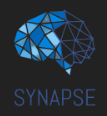

**Unsupervised Learning**

In this task, we will explore data dimensionality reduction and different  clustering methods.

We will work with the **Samsung Human Activity Recognition dataset**. The data comes from the accelerometers and gyros of Samsung mobile phones, the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

We imagine that the type of activity is unknown to us (unlabelled), and we will try to cluster people purely on the basis of available features.

# **Imports and Data loading**

Import some basic modules like numpy, pandas, seaborn, tqdm_notebook & matplotlib.pyplot

In [ ]:
# code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm

Mount your google drive

In [ ]:
# code here
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Mention the path of dataset, 4 paths for the 4 different txt files.

In [ ]:
# Mention the path in the strings below
samsung_train_path = "/content/gdrive/My Drive/synapse_w4/samsung_train.txt"
samsung_train_labels_path = "/content/gdrive/My Drive/synapse_w4/samsung_train_labels.txt"

samsung_test_path = "/content/gdrive/My Drive/synapse_w4/samsung_test.txt"
samsung_test_labels_path = "/content/gdrive/My Drive/synapse_w4/samsung_test_labels.txt"

This time we will be using np.loadtxt() for reading our data. Code for the same has been given (do not modify), but we expect you to understand the working of it.

Ref.: https://www.geeksforgeeks.org/numpy-loadtxt-in-python/

In [ ]:
# DO NOT MODIFY
X_train = np.loadtxt(samsung_train_path)
y_train = np.loadtxt(samsung_train_labels_path).astype(int)

X_test = np.loadtxt(samsung_test_path)
y_test = np.loadtxt(samsung_test_labels_path).astype(int)

Just to confirm that your data has been loaded properly, execute the below cell. You won't receive any error if everything is correct.

NOTE: If you get an Assertion error, then you probably did something wrong above.

In [ ]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

# **Pre-processing**

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge *X_train* with *X_test*, and *y_train* with *y_test*.

Hint: 
1. Merge X_train and X_test into X {use [np.vstack()](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)}
2. Merge y_train and y_test into y {use [np.hstack()](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)}

In [ ]:
# Uncomment the below lines and code
X = np.vstack((X_train,X_test))
y = np.hstack((y_train,y_test))

Using numpy, print the unique values of the labels of the target class (i.e. "y").

Ref.: https://www.geeksforgeeks.org/python-numpy-np-unique-method/


In [ ]:
# code here
print(np.unique(y))

[1 2 3 4 5 6]


Store the size (or number) of unique values of the labels of the target class (i.e. "y") in a variable named n_classes.

In [ ]:
# Uncomment the below line and code
n_classes = len(np.unique(y))
print(n_classes)

6


Here the 6 labels (or classes) correspond to:
- 1 - walking
- 2 - going up the stairs
- 3 - going down the stairs
- 4 - sitting
- 5 - standing
- 6 - lying down

So we wish to create 6 clusters where each cluster can represent one of the above activities.

Scale the sample (i.e. X) using [`StandardScaler()`](https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python)

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
# initialize an instance of StandardScaler()
ss_obj = StandardScaler()
# use the above instance to fit_transform "X" and assign it into a new variable "X_scaled"
X_scaled = ss_obj.fit_transform(X)

# **Dimensionality Reduction using PCA**

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

Reduce the number of dimensions using PCA, 

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 17.
2. Fit X_scaled over the PCA instance created
3. Transform X_scaled over the fitted PCA instance and store it in a variable named X_pca.

Theory: https://towardsdatascience.com/dimensionality-reduction-explained-5ae45ae3058e

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

In [ ]:
# code here
pca = PCA(n_components=0.9,random_state=17)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Let's check the shape of X_pca.

In [ ]:
# code here
print(X_pca.shape)
# Should print (10299, 65) if everything is correct.

(10299, 65)


Shape of X was (10299, 561) i.e 561 dimensions

Shape of X_pca is (10299, 65) i.e. 65 dimenisons

Hence we have successfully reduced dimensions using PCA.

# **K-Means (Partition based clustering)**

Run the data clustering using the `KMeans` method, training the model on data with a reduced PCA dimension (i.e. X_pca). In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be searching.

Parameters for KMeans:

- **n_clusters** = n_classes (number of unique labels of the target class (i.e. 6))
- **n_init** = 100
- **random_state** = 17 (for the reproducibility of the result)

Other parameters should have default values.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# initialise KMeans instance using above given parameters
kmeans = KMeans(n_clusters=n_classes,n_init=100,random_state=17)
# code here

In [ ]:
# fit the KMeans instance over X_pca
kmeans.fit(X_pca)
# code here

KMeans(n_clusters=6, n_init=100, random_state=17)

In [ ]:
# store the cluster labels into variable named cluster_labels
# Hint: .labels_ 
cluster_labels = kmeans.labels_
# code here

Major use of PCA is for visualization. So, let's visualize the 6 clusters using a scatter plot

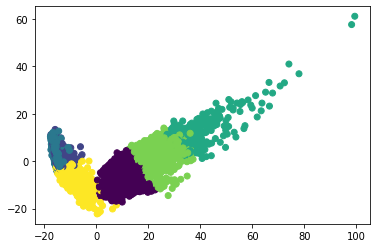

In [ ]:
# DO NOT MODIFY. Just uncomment & execute below code line
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis');

Now look at the correspondence between the cluster marks (i.e. cluster_labels) and the original class labels (i.e. y) and what kinds of activities the KMeans algorithm is confused at.

Ref.: [Pandas Crosstab](https://pbpython.com/pandas-crosstab.html)

In [ ]:
# Hint: Use pandas.crosstab() with margins=True
# code here
pd.crosstab(cluster_labels,y,margins=True,margins_name='Total')

col_0,1,2,3,4,5,6,Total
row_0,,,,,,,
0,903,1241,320,1,0,5,2470
1,0,0,0,1235,1344,52,2631
2,0,0,0,91,0,1558,1649
3,78,5,196,0,0,0,279
4,741,296,890,0,0,0,1927
5,0,2,0,450,562,329,1343
Total,1722,1544,1406,1777,1906,1944,10299


It can be seen that kMeans does not distinguish activities very well. 

For example: Suppose there are 1722 walking activities. But those 1722 get splitted into multiple clusters rather than a single cluster of walking. Similarly for the rest of the activities. The clusters created are not disjoint. 

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [adjusted_rand_index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [ ]:
# import ARI
from sklearn.metrics.cluster import adjusted_rand_score
# code to compute ARI for our KMeans clusters
adjusted_rand_score(y,cluster_labels)

0.4198070012602345

# **Optional Task:**


**Only the below 4 cells are optional. Agglomerative Clustering is not optional.**

Find optimal value of n_clusters for our KMeans model using the elbow method.

So, let's use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

- Loop n_clusters from 1 to 7 and fit a KMeans model over X_pca each time.
- Calculate inertia for each KMeans model and append it to a list. (Hint: inertia_list.append(np.sqrt(model_name.inertia_)) ) 
- Plot a line graph of inertia_list vs n_clusters value
- The optimal n_clusters value is the point at which the graph changes it steepness drastically.
- If everything is correct, you will find optimal n_clusters value to be 2 using elbow method.

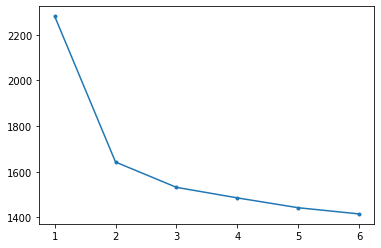

In [ ]:
# code here

inertia_list = []
n_clusters = []
for n in range(1,7):
  kmeans = KMeans(n_clusters = n,n_init=100,random_state=17)
  kmeans.fit(X_pca)
  inertia_list.append(np.sqrt(kmeans.inertia_))
  n_clusters.append(n)

plt.plot(n_clusters,inertia_list,marker=".")
plt.show()

So we see that KMeans clustering does not work well for our dataset. So let's try Agglomerative Clustering.

# **Agglomerative (Heirarichal clustering)**

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
# first import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

 Create an instance of AgglomerativeClustering() and fit it over X_pca.
 
 NOTE: specify n_clusters equal to n_classes


In [ ]:
# code here
ag = AgglomerativeClustering(n_clusters=n_classes).fit(X_pca)

Visualize the clusters

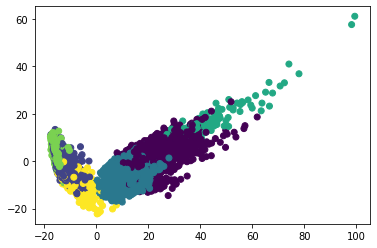

In [ ]:
# DO NOT MODIFY. Just uncomment and execute below code
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ag.labels_,cmap='viridis');

Now look at the correspondence between the cluster marks and the original class labels and what kinds of activities the Agglomerative algorithm is confused at.

In [ ]:
# Hint: Use pandas.crosstab() with margins=True
# code here
pd.crosstab(ag.labels_,y,margins=True,margins_name='Total')

col_0,1,2,3,4,5,6,Total
row_0,,,,,,,
0,800,337,1144,0,0,0,2281
1,0,0,0,1559,1832,74,3465
2,896,1207,138,0,0,0,2241
3,26,0,124,0,0,0,150
4,0,0,0,71,0,1604,1675
5,0,0,0,147,74,266,487
Total,1722,1544,1406,1777,1906,1944,10299


Similar to KMeans, calculate adjusted_rand_index (ARI) for Agglomerative Clustering

In [ ]:
# code here
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,ag.labels_)

0.49362763373004886

Play with other hyperparameters for Agglomerative clustering like linkage, affinity, etc. Try to acheive maximum ARI.

Method: Tune the hyperparameters and select the hyperparameter set where ARI is maximum.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
affinity = [ "euclidean", "l1","l2", "manhattan", "cosine"]
linkage = ["ward", "complete", "average", "single"]
ari_list = []

for i in affinity:
  for j in linkage:
    if (j != "ward"):
      ag = AgglomerativeClustering(n_clusters=n_classes,affinity=i,linkage=j)
    else:
      ag = AgglomerativeClustering(n_clusters=n_classes)
    ag.fit(X_pca)
    ari_list.append(adjusted_rand_score(y,ag.labels_))

print(max(ari_list))



0.49362763373004886


**Conclusion**

Compare ARI values of KMeans and Agglomerative Clustering. Mention below which one is better among the two. Also, specify reasons to support your claim

ARI value of Agglomerative Clustering is better than that of KMeans. The reasons for this are:


*   Agglomerative clustering does not require you to specify the number of clusters beforehand which is a limitation of KMeans.
*   Centroid positions in KMeans can be different for different iteartions leading to varying results, whereas Agglomerative Clustering generates the same clusters.



# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **DB-SCAN Clustering Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

Clustering is a way to group a set of data points in a way that similar data points are grouped together. Therefore, clustering algorithms look for similarities or dissimilarities among data points. Clustering is an unsupervised learning method so there is no label associated with data points.

There are different approaches and algorithms to perform clustering tasks which can be divided into three sub-categories:

*   Partition-based clustering: E.g. k-means, k-median
*   Hierarchical clustering: E.g. Agglomerative, Divisive
*   Density-based clustering: E.g. DBSCAN

#DBSCAN algorithm

DBSCAN stands for density-based spatial clustering of applications with noise.
There are two key parameters of DBSCAN:

*  **eps**: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.

*  **minPts**: Minimum number of data points to define a cluster.

Based on these two parameters, points are classified as core point, border point, or outlier:

*  **Core point**: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
* **Border point**: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
*  **Outlier**: A point is an outlier if it is not a core point and not reachable from any core points.


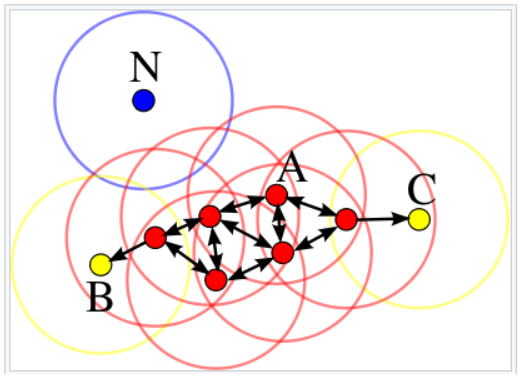


# **End of Task**

> ©DJS Synapse 2022 - 2023